# 1. Prerequisites, Libraries and Packages

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e24/sample_submission.csv
/kaggle/input/playground-series-s3e24/train.csv
/kaggle/input/playground-series-s3e24/test.csv


In [2]:
import numpy as np                          # For linear algebra
import pandas as pd                         # For data manipulation
import matplotlib as mlt                    # For visualization
import matplotlib.pyplot as plt             # For visualization(scripting layer)
import seaborn as sns                       # For visualization

pd.set_option('display.max_columns',None)   # To display all columns in a dataset

import warnings                             # To avoid warning flash
warnings.filterwarnings('ignore')  

from sklearn.model_selection import train_test_split


# 2. Data Preparation

We read the data files for training and testing the model.

In [3]:
train = pd.read_csv(r'/kaggle/input/playground-series-s3e24/train.csv', index_col = 'id')
test = pd.read_csv(r'/kaggle/input/playground-series-s3e24/test.csv', index_col = 'id')

Check the training the dataset. This is the dataset that we will be using to train the model.

In [4]:
train.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
id                                                                            
0    55         165          60       81.0             0.5              0.6   
1    70         165          65       89.0             0.6              0.7   
2    20         170          75       81.0             0.4              0.5   
3    35         180          95      105.0             1.5              1.2   
4    30         165          60       80.5             1.5              1.0   

    hearing(left)  hearing(right)  systolic  relaxation  fasting blood sugar  \
id                                                                             
0               1               1       135          87                   94   
1               2               2       146          83                  147   
2               1               1       118          75                   79   
3               1               1       131          88                   91   
4               1               1       121          76                   91   

    Cholesterol  triglyceride  HDL  LDL  hemoglobin  Urine protein  \
id                                                                   
0           172           300   40   75        16.5              1   
1           194            55   57  126        16.2              1   
2           178           197   45   93        17.4              1   
3           180           203   38  102        15.9              1   
4           155            87   44   93        15.4              1   

    serum creatinine  AST  ALT  Gtp  dental caries  smoking  
id                                                           
0                1.0   22   25   27              0        1  
1                1.1   27   23   37              1        0  
2                0.8   27   31   53              0        1  
3                1.0   20   27   30              1        0  
4                0.8   19   13   17              0        1

Check the testing the dataset. This is the dataset that we will be using for submission. We will evaluate our trained model with this dataset.

In [5]:
test.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
id                                                               
159256   40         165          70       84.0             1.2   
159257   80         160          60       93.0             1.0   
159258   60         170          70       86.5             0.6   
159259   40         160          50       67.0             0.3   
159260   40         170          75       89.4             1.0   

        eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
id                                                                             
159256              1.2              1               1       130          89   
159257              1.0              2               2       144          72   
159258              0.7              1               1       117          75   
159259              0.4              1               1       116          62   
159260              0.9              1               1       132          94   

        fasting blood sugar  Cholesterol  triglyceride  HDL  LDL  hemoglobin  \
id                                                                             
159256                  107          200           186   49  115        14.2   
159257                   93          172           158   35  104        13.0   
159258                   92          161           173   39   88        15.4   
159259                   91          213            47   75  128        14.5   
159260                   79          170           100   39  123        16.5   

        Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  
id                                                                     
159256              1               0.9   19   25   32              0  
159257              1               1.1   20   12   24              0  
159258              1               1.4   38   60   36              0  
159259              1               0.6   25   18   10              1  
159260              1               1.0   30   39   27              1

Check the shape, number of rows and columns of both datasets.

In [6]:
print("Train Data")
print(train.shape)
print("Number of rows: "+str(train.shape[0]))
print("Number of columns: "+str(train.shape[1]))

print("---------------------")
print("Test Data")
print(test.shape)
print("Number of rows: "+str(test.shape[0]))
print("Number of columns: "+str(test.shape[1]))

Train Data
(159256, 23)
Number of rows: 159256
Number of columns: 23
---------------------
Test Data
(106171, 22)
Number of rows: 106171
Number of columns: 22


# 3. Exploratory Data Analysis

## 3.1 Data Cleaning

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin           1

In [8]:
train.describe().T

count        mean        std    min    25%    50%  \
age                  159256.0   44.306626  11.842286   20.0   40.0   40.0   
height(cm)           159256.0  165.266929   8.818970  135.0  160.0  165.0   
weight(kg)           159256.0   67.143662  12.586198   30.0   60.0   65.0   
waist(cm)            159256.0   83.001990   8.957937   51.0   77.0   83.0   
eyesight(left)       159256.0    1.005798   0.402113    0.1    0.8    1.0   
eyesight(right)      159256.0    1.000989   0.392299    0.1    0.8    1.0   
hearing(left)        159256.0    1.023974   0.152969    1.0    1.0    1.0   
hearing(right)       159256.0    1.023421   0.151238    1.0    1.0    1.0   
systolic             159256.0  122.503648  12.729315   77.0  114.0  121.0   
relaxation           159256.0   76.874071   8.994642   44.0   70.0   78.0   
fasting blood sugar  159256.0   98.352552  15.329740   46.0   90.0   96.0   
Cholesterol          159256.0  195.796165  28.396959   77.0  175.0  196.0   
triglyceride         159256.0  127.616046  66.188989    8.0   77.0  115.0   
HDL                  159256.0   55.852684  13.964141    9.0   45.0   54.0   
LDL                  159256.0  114.607682  28.158931    1.0   95.0  114.0   
hemoglobin           159256.0   14.796965   1.431213    4.9   13.8   15.0   
Urine protein        159256.0    1.074233   0.347856    1.0    1.0    1.0   
serum creatinine     159256.0    0.892764   0.179346    0.1    0.8    0.9   
AST                  159256.0   25.516853   9.464882    6.0   20.0   24.0   
ALT                  159256.0   26.550296  17.753070    1.0   16.0   22.0   
Gtp                  159256.0   36.216004  31.204643    2.0   18.0   27.0   
dental caries        159256.0    0.197996   0.398490    0.0    0.0    0.0   
smoking              159256.0    0.437365   0.496063    0.0    0.0    0.0   

                       75%     max  
age                   55.0    85.0  
height(cm)           170.0   190.0  
weight(kg)            75.0   130.0  
waist(cm)             89.0   127.0  
eyesight(left)         1.2     9.9  
eyesight(right)        1.2     9.9  
hearing(left)          1.0     2.0  
hearing(right)         1.0     2.0  
systolic             130.0   213.0  
relaxation            82.0   133.0  
fasting blood sugar  103.0   375.0  
Cholesterol          217.0   393.0  
triglyceride         165.0   766.0  
HDL                   64.0   136.0  
LDL                  133.0  1860.0  
hemoglobin            15.8    21.0  
Urine protein          1.0     6.0  
serum creatinine       1.0     9.9  
AST                   29.0   778.0  
ALT                   32.0  2914.0  
Gtp                   44.0   999.0  
dental caries          0.0     1.0  
smoking                1.0     1.0

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106171 entries, 159256 to 265426
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  106171 non-null  int64  
 1   height(cm)           106171 non-null  int64  
 2   weight(kg)           106171 non-null  int64  
 3   waist(cm)            106171 non-null  float64
 4   eyesight(left)       106171 non-null  float64
 5   eyesight(right)      106171 non-null  float64
 6   hearing(left)        106171 non-null  int64  
 7   hearing(right)       106171 non-null  int64  
 8   systolic             106171 non-null  int64  
 9   relaxation           106171 non-null  int64  
 10  fasting blood sugar  106171 non-null  int64  
 11  Cholesterol          106171 non-null  int64  
 12  triglyceride         106171 non-null  int64  
 13  HDL                  106171 non-null  int64  
 14  LDL                  106171 non-null  int64  
 15  hemoglobin       

In [10]:
test.describe().T

count        mean        std    min    25%    50%  \
age                  106171.0   44.426538  11.897138   20.0   40.0   40.0   
height(cm)           106171.0  165.221322   8.837065  135.0  160.0  165.0   
weight(kg)           106171.0   67.125618  12.586569   30.0   60.0   65.0   
waist(cm)            106171.0   82.999892   8.946584   51.0   77.0   83.0   
eyesight(left)       106171.0    1.004776   0.397690    0.1    0.8    1.0   
eyesight(right)      106171.0    0.999483   0.385752    0.1    0.8    1.0   
hearing(left)        106171.0    1.024216   0.153719    1.0    1.0    1.0   
hearing(right)       106171.0    1.023980   0.152988    1.0    1.0    1.0   
systolic             106171.0  122.475403  12.765542   71.0  114.0  121.0   
relaxation           106171.0   76.820676   9.018782   40.0   70.0   78.0   
fasting blood sugar  106171.0   98.397943  15.337904   46.0   90.0   96.0   
Cholesterol          106171.0  195.874391  28.435413   66.0  175.0  196.0   
triglyceride         106171.0  127.406203  66.352488    8.0   77.0  114.0   
HDL                  106171.0   55.922286  14.000552   18.0   45.0   54.0   
LDL                  106171.0  114.597404  26.943401    1.0   95.0  114.0   
hemoglobin           106171.0   14.793354   1.434296    5.0   13.8   15.0   
Urine protein        106171.0    1.072798   0.340818    1.0    1.0    1.0   
serum creatinine     106171.0    0.892463   0.179927    0.1    0.8    0.9   
AST                  106171.0   25.559616   9.504442    6.0   20.0   24.0   
ALT                  106171.0   26.565427  17.944195    1.0   16.0   22.0   
Gtp                  106171.0   36.086888  30.928138    2.0   18.0   27.0   
dental caries        106171.0    0.195458   0.396555    0.0    0.0    0.0   

                       75%     max  
age                   55.0    85.0  
height(cm)           170.0   190.0  
weight(kg)            75.0   130.0  
waist(cm)             89.0   127.7  
eyesight(left)         1.2     9.9  
eyesight(right)        1.2     9.9  
hearing(left)          1.0     2.0  
hearing(right)         1.0     2.0  
systolic             130.0   213.0  
relaxation            82.0   140.0  
fasting blood sugar  103.0   423.0  
Cholesterol          217.0   369.0  
triglyceride         164.0   548.0  
HDL                   64.0   148.0  
LDL                  133.0  1220.0  
hemoglobin            15.8    21.1  
Urine protein          1.0     6.0  
serum creatinine       1.0     9.9  
AST                   29.0   778.0  
ALT                   33.0  2914.0  
Gtp                   44.0   999.0  
dental caries          0.0     1.0

In [11]:
train[train.duplicated()].sum()

age                    0.0
height(cm)             0.0
weight(kg)             0.0
waist(cm)              0.0
eyesight(left)         0.0
eyesight(right)        0.0
hearing(left)          0.0
hearing(right)         0.0
systolic               0.0
relaxation             0.0
fasting blood sugar    0.0
Cholesterol            0.0
triglyceride           0.0
HDL                    0.0
LDL                    0.0
hemoglobin             0.0
Urine protein          0.0
serum creatinine       0.0
AST                    0.0
ALT                    0.0
Gtp                    0.0
dental caries          0.0
smoking                0.0
dtype: float64

In [12]:
test[test.duplicated()].sum()

age                    0.0
height(cm)             0.0
weight(kg)             0.0
waist(cm)              0.0
eyesight(left)         0.0
eyesight(right)        0.0
hearing(left)          0.0
hearing(right)         0.0
systolic               0.0
relaxation             0.0
fasting blood sugar    0.0
Cholesterol            0.0
triglyceride           0.0
HDL                    0.0
LDL                    0.0
hemoglobin             0.0
Urine protein          0.0
serum creatinine       0.0
AST                    0.0
ALT                    0.0
Gtp                    0.0
dental caries          0.0
dtype: float64

- Some of the columns/features in our training and test dataset are skewed (mean =/= 50%).
- All of the features are numerical.
- No missing values in both datasets.
- No duplicates in both datasets.

It seems that both of our datasets already cleaned.

## 3.2 Training-Test Adversial Validation

**Adversarial Validation**

The purpose of adversarial validation is to check whether train and test dataset have similar distribution or not. If the validation gives ROC-AUC score of close to .5, we can say that both datasets are similar. However, if it's far from .5, both dataset have different distribution.

The reason we want to do this is to make sure that we can trust our CV score, since a trusted CV only comes from dataset with similar distribution.

The adversarial validation code is derived from [IQBAL SYAH AKBAR](https://www.kaggle.com/code/hazmannaim/software-defect-prediction-simple-ml-ensemble#Introduction^).

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, make_scorer, f1_score

def adversarial_validation(dataset_1 = train, dataset_2 = test, label = 'Train-Test'):

    adv_train = dataset_1.drop('smoking', axis = 1)#[dataset_1.lesion_3 == 0]
    adv_test = dataset_2.copy()

    adv_train['is_test'] = 0
    adv_test['is_test'] = 1

    adv = pd.concat([adv_train, adv_test], ignore_index = True)

    adv_shuffled = adv.sample(frac = 1)

    adv_X = adv_shuffled.drop('is_test', axis = 1)
    adv_y = adv_shuffled.is_test

    skf = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = True)

    val_scores = []
    predictions = np.zeros(len(adv))

    for fold, (train_idx, val_idx) in enumerate(skf.split(adv_X, adv_y)):
    
        adv_lr = RandomForestClassifier(random_state = 0)
        adv_lr.fit(adv_X.iloc[train_idx], adv_y.iloc[train_idx])
        
        val_preds = adv_lr.predict_proba(adv_X.iloc[val_idx])[:,1]
        predictions[val_idx] = val_preds
        val_score = roc_auc_score(adv_y.iloc[val_idx], val_preds)
        val_scores.append(val_score)
    
    fpr, tpr, _ = roc_curve(adv['is_test'], predictions)
    
    plt.figure(figsize = (10, 10))
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", label="Indistinguishable Datasets")
    sns.lineplot(x=fpr, y=tpr, label="Adversarial Validation Classifier")
    plt.title(f'{label} Validation = {np.mean(val_scores):.5f}', weight = 'bold', size = 17)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [14]:
#----
# Run this cell for adversial_validation
#----
#adversarial_validation()

The result is relatively close to 0.5. Adversarial validation score of 0.5 indicates that our model cannot differentiate between submission and training datasets, so we can trust our cross-validation score as an estimate of our model’s performance on new data.

## 3.3 Data Distribution

Lets check the distribution of the training and test datasets.

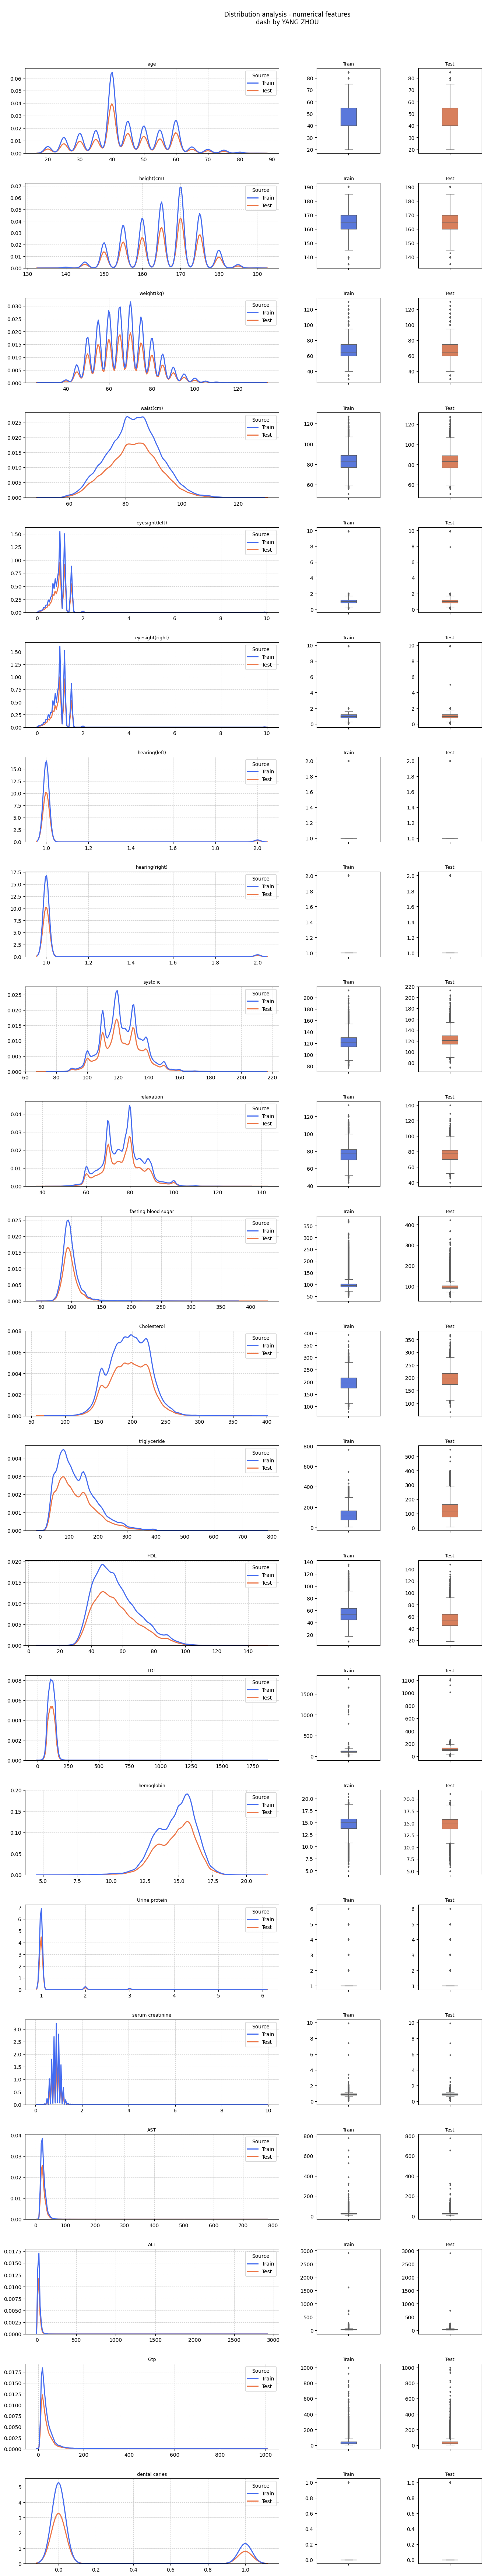

In [15]:
num = test.select_dtypes(include=['int64','float64']).columns

df = pd.concat([train[num].assign(Source = 'Train'), test[num].assign(Source = 'Test')], ignore_index = True)

# Use of more advanced artistic matplotlib interface (see the axes)
fig, axes = plt.subplots(len(num), 3 ,figsize = (16, len(num) * 4), gridspec_kw = {'hspace': 0.35, 'wspace': 0.3, 'width_ratios': [0.80, 0.20, 0.20]})

for i,col in enumerate(num):
    ax = axes[i,0]
    sns.kdeplot(data = df[[col, 'Source']], x = col, hue = 'Source', palette=['#456cf0', '#ed7647'], linewidth = 2.1, warn_singular=False, ax = ax) # Use of seaborn with artistic interface
    ax.set_title(f"\n{col}",fontsize = 9)
    ax.grid(visible=True, which = 'both', linestyle = '--', color='lightgrey', linewidth = 0.75)
    ax.set(xlabel = '', ylabel = '')

    ax = axes[i,1]
    sns.boxplot(data = df.loc[df.Source == 'Train', [col]], y = col, width = 0.25, linewidth = 0.90, fliersize= 2.25, color = '#456cf0', ax = ax)
    ax.set(xlabel = '', ylabel = '')
    ax.set_title("Train", fontsize = 9)

    ax = axes[i,2]
    sns.boxplot(data = df.loc[df.Source == 'Test', [col]], y = col, width = 0.25, linewidth = 0.90, fliersize= 2.25, color = '#ed7647', ax = ax)
    ax.set(xlabel = '', ylabel = '')
    ax.set_title("Test", fontsize = 9)

plt.suptitle(f'\nDistribution analysis - numerical features\ndash by YANG ZHOU\n',fontsize = 12, y = 0.9, x = 0.57)
plt.show()

It seems that both datasets have similar distributions as proven by adversial validation AUC score.

Lets check the distribution of our target 'smoking'.

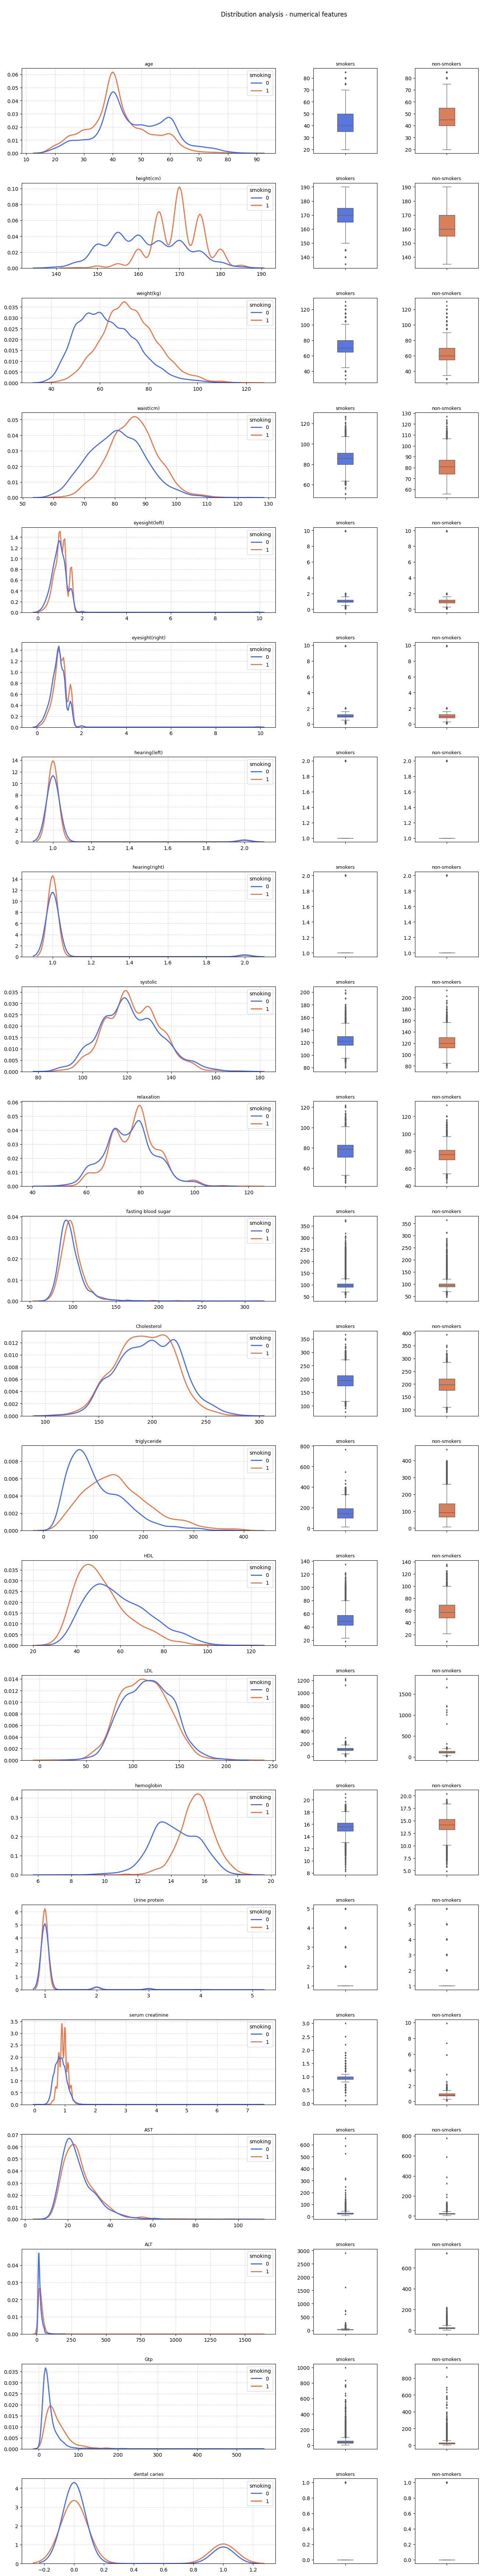

In [16]:
num = train.select_dtypes(include=['int64','float64']).columns
num = num[:-1]
fig, axes = plt.subplots(len(num), 3 ,figsize = (16, len(num) * 4), gridspec_kw = {'hspace': 0.35, 'wspace': 0.3, 'width_ratios': [0.80, 0.20, 0.20]})

for i,col in enumerate(num):
    ax = axes[i,0]
    sns.kdeplot(data=train.sample(5000), x=col, hue='smoking', palette=['#456cf0', '#ed7647'], linewidth=2.1, common_norm=False, ax=ax) # Use of seaborn with artistic interface
    ax.set_title(f"\n{col}",fontsize = 9)
    ax.grid(visible=True, which = 'both', linestyle = '--', color='lightgrey', linewidth = 0.75)
    ax.set(xlabel = '', ylabel = '')

    ax = axes[i,1]
    sns.boxplot(data = train[train['smoking'] == 1], y=col, width=0.25, linewidth=0.90, fliersize=2.25, color='#456cf0', ax=ax)
    ax.set(xlabel = '', ylabel = '')
    ax.set_title("smokers", fontsize = 9)

    ax = axes[i,2]
    sns.boxplot(data=train[train['smoking'] == 0], y=col, width = 0.25, linewidth = 0.90, fliersize= 2.25, color = '#ed7647', ax = ax)
    ax.set(xlabel = '', ylabel = '')
    ax.set_title("non-smokers", fontsize = 9)

plt.suptitle(f'\nDistribution analysis - numerical features\n',fontsize = 12, y = 0.9, x = 0.57)
plt.show()

A little better. We can now see more clearly that people who smoke tend to have some health indicators greater than people who don't smoke.

Some features have lots of outliers, but that's not a problem if we won't use algorithms based on distance.

Some of the features are actually categorical. [Reference](https://www.kaggle.com/competitions/playground-series-s3e24/discussion/450375)

Lets separate the features into categorical and numerical features.

In [17]:
# Now let"s separate the features into categorical and numerical
cat_cols = ["hearing(left)", "hearing(right)", "Urine protein", "dental caries"]
num_cols = [col for col in train.columns if col not in cat_cols and col not in ["smoking"]]

In [18]:
cat_cols

['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries']

In [19]:
num_cols

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp']

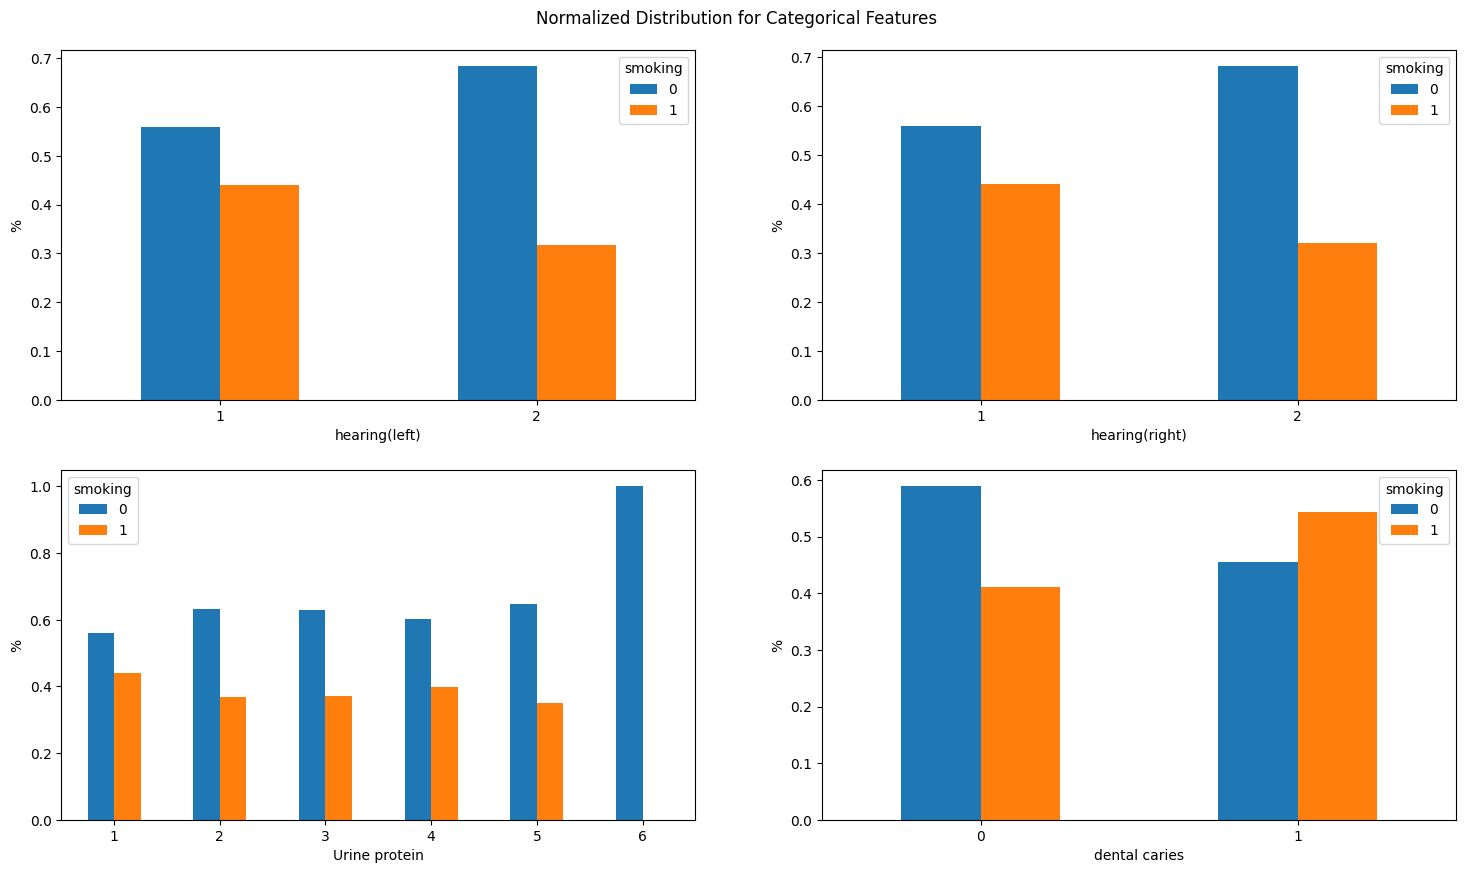

In [20]:
# Plot the countplot
fig, ax = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle("Normalized Distribution for Categorical Features", y=0.92)
n_col = 0
n_row = 0

for i, col in enumerate(cat_cols):
    ct = pd.crosstab(train[col], train["smoking"], normalize="index")
    
    if i <= 1:
        ct.plot(kind="bar", ax=ax[n_row, n_col], ylabel="%", rot=0)
        n_col += 1
    if i > 1:
        n_row = 1
        ct.plot(kind="bar", ax=ax[n_row, n_col - 2], ylabel="%", rot=0)
        n_col += 1

The most interesting feature here seems to be **dental caries** because people who smoke are more likely to have caries.

Let's see how is the distribution of the target.

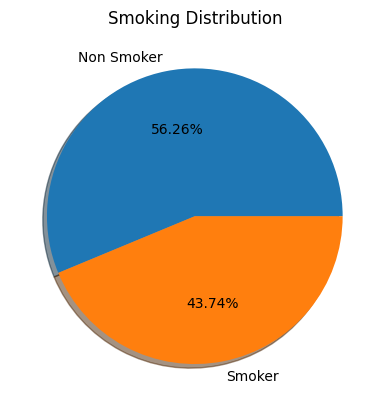

In [21]:
smoking = train["smoking"].value_counts()

plt.pie(smoking, normalize=True, labels=["Non Smoker", "Smoker"], autopct="%.2f%%", shadow=True)
plt.title("Smoking Distribution")

plt.show()

We can see above that the target distribution is a little bit balanced: about 43.7% of the individuals are smokers.

Lets check correlation matrix.

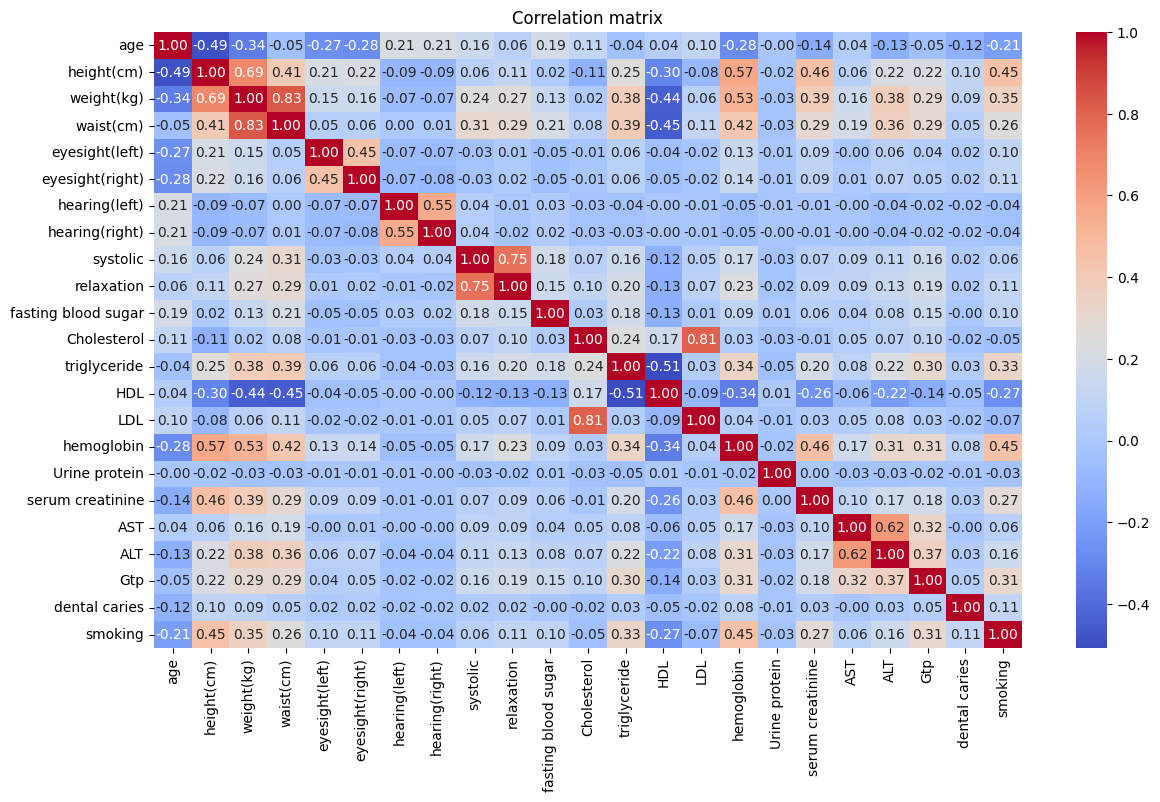

In [22]:
fig = plt.figure(figsize=(14, 8))

train_corr = train.corr()
sns.heatmap(train_corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation matrix")

plt.show()

Some features are highly correlated with each other, such as **Cholesterol** with **LDL**, **systolic** with **relaxation**, and **waist(cm)** with **weight(kg)**. Let's visualize those correlation with a scatter plot.

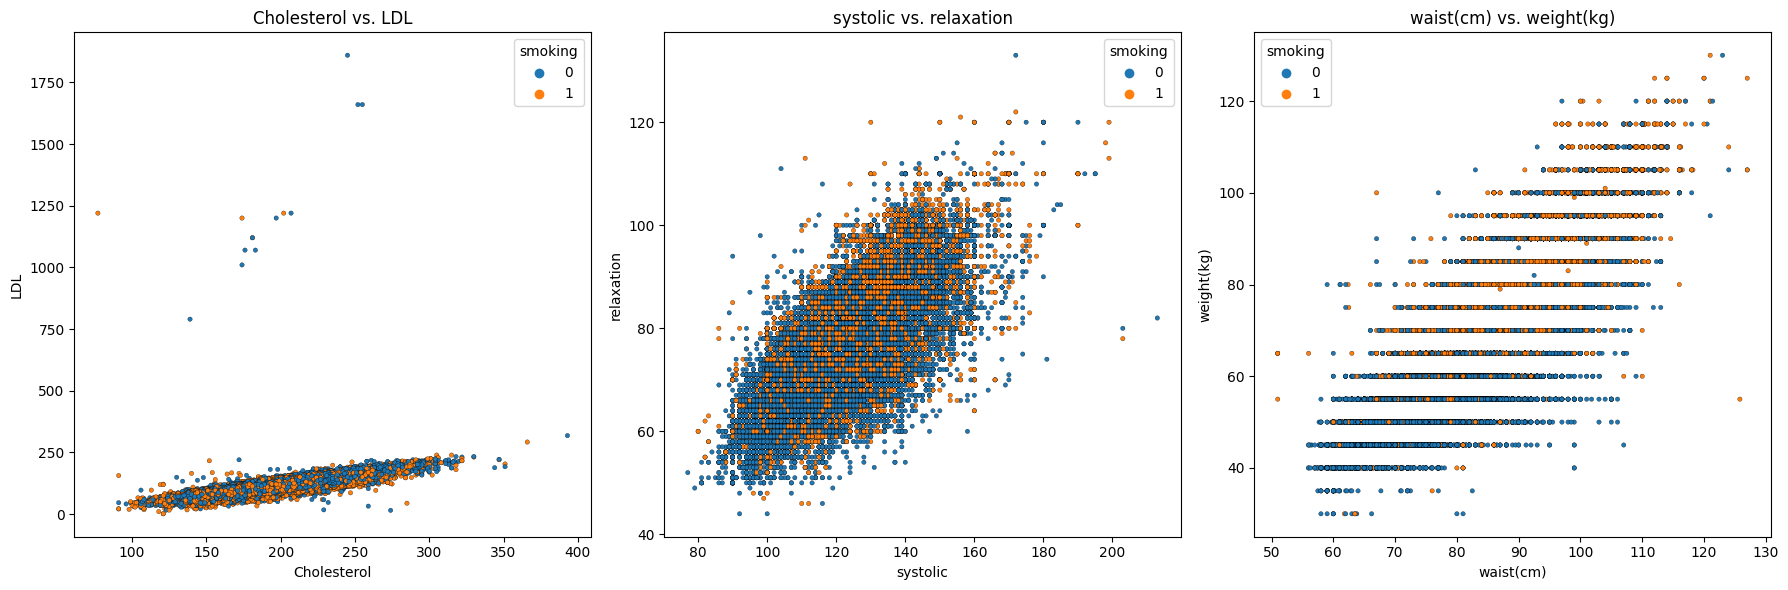

In [23]:
high_corr = [["Cholesterol", "LDL"], ["systolic", "relaxation"], ["waist(cm)", "weight(kg)"]]

fig = plt.figure(figsize=(18, 6))
for i, duo in enumerate(high_corr):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=train, x=duo[0], y=duo[1], hue="smoking", s=10, linewidth=0.2, edgecolor="k")
    plt.title(f"{duo[0]} vs. {duo[1]}")

fig.tight_layout()
plt.show()

It's likely that each duo represents basically the same information, which means we might have multicollinearity. We'll decide what to do later.

At last, let's see how the correlation is with the target.

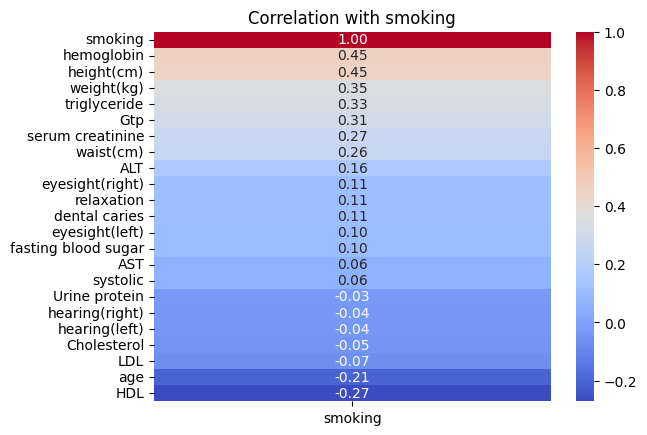

In [24]:
corr_smoking = train_corr["smoking"].sort_values(ascending=False).to_frame()
sns.heatmap(corr_smoking, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation with smoking")

plt.show()

**hemoglobin** and **height(cm)** have the highest correlation with the target. also, some features have a correlation next to zero, so they are likely to not contribute to the models.

Check correlation matrix with encoded categorical features.

In [25]:
# Encode the categorical columns
onehot_train = pd.get_dummies(train, columns=cat_cols, dtype=float)
onehot_test = pd.get_dummies(test, columns=cat_cols, dtype=float)

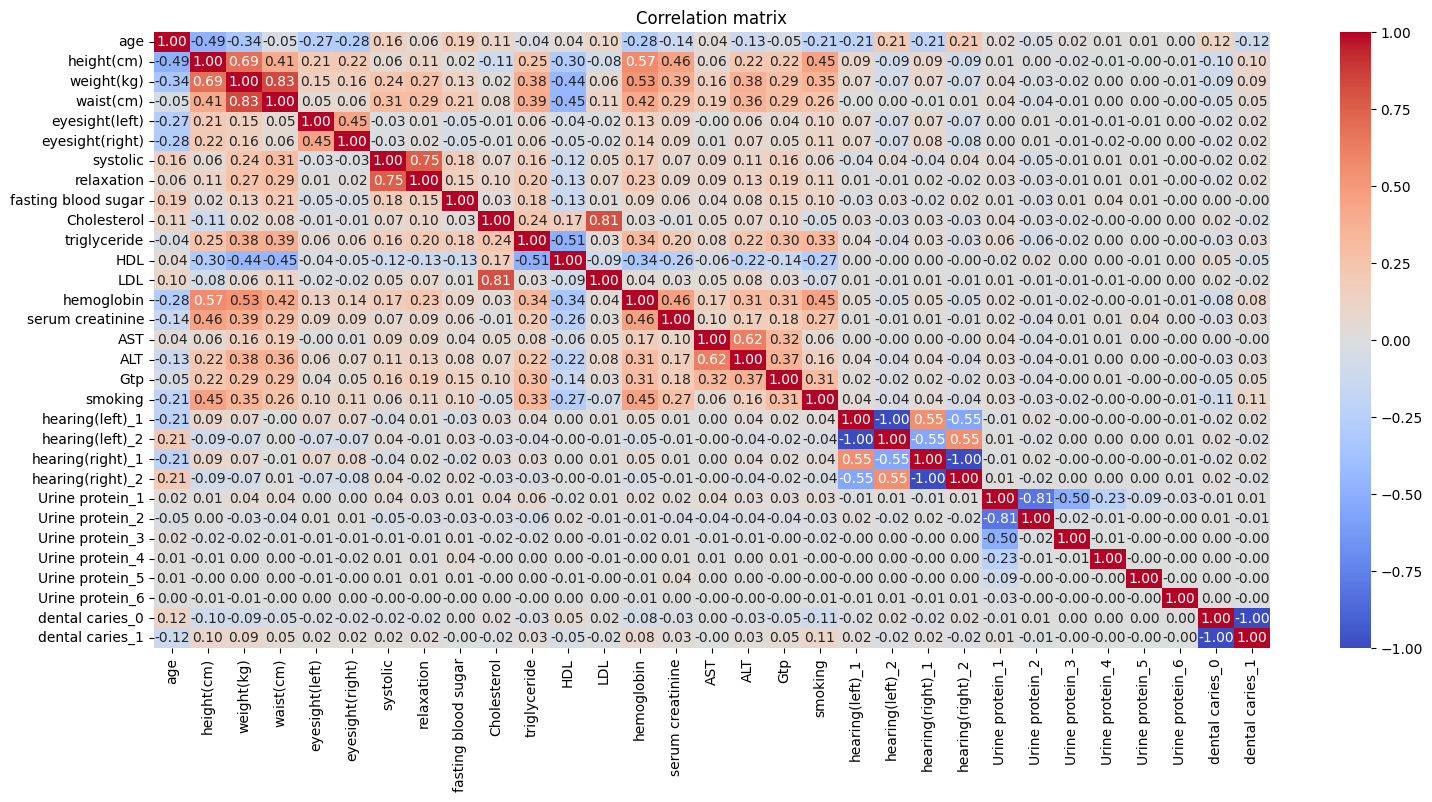

In [26]:
# Plot the correlation matrix
fig = plt.figure(figsize=(18, 8))

onehot_train_corr = onehot_train.corr()
sns.heatmap(onehot_train_corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation matrix")

plt.show()

## 3.5 Features Importance

Let's explore the contribution of each feature to our future models. By doing it, we can ensure that we'll have the best features to deliver to our models.

In [27]:
def feat_importances(df):
    # Separate the train set into X and y
    X = df.drop("smoking", axis=1)
    y = df["smoking"]

    # Create a validation set
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)
    
    # Train a RandomForest
    forest = RandomForestClassifier()
    forest.fit(X_train, y_train)

    # Make prediction on the validation set
    y_pred = forest.predict(X_val)
    y_pred_proba = forest.predict_proba(X_val)[:, 1]

    # Classification Report
    print("\033[1m ROC AUC Score: \033[0m", roc_auc_score(y_val, y_pred_proba))
    print("\n")
    
    # Extract the feature importances
    importances = forest.feature_importances_

    # Create a DataFrame
    importances_df = pd.DataFrame(data=importances, index=X.columns).reset_index()
    importances_df.rename(columns={"index": "features", 0: "importances"}, inplace=True)
    importances_df.sort_values("importances", ascending=False, inplace=True)

    # Plot the results
    sns.barplot(data=importances_df, x="importances", y="features", color="C0")

    plt.show()

 ROC AUC Score:  0.8568528032279449




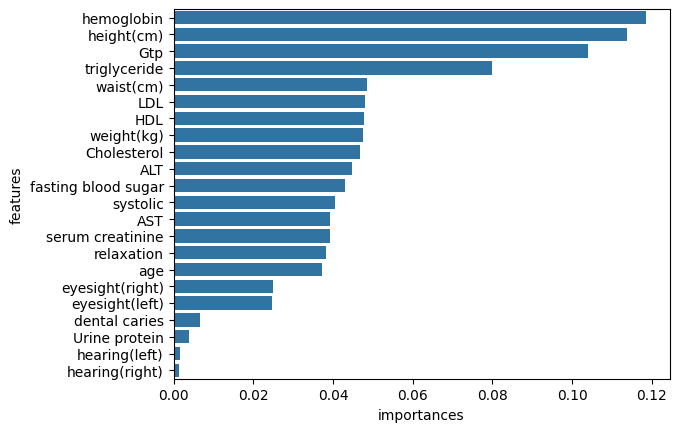

In [28]:
# Fit and evaluate a RandomForest with the normal train set
feat_importances(train)

Based on the feature importances, we can see that three features are basically useless for our predictive model.

Let"s see how the onehot_train set performs.

 ROC AUC Score:  0.8549397344224151




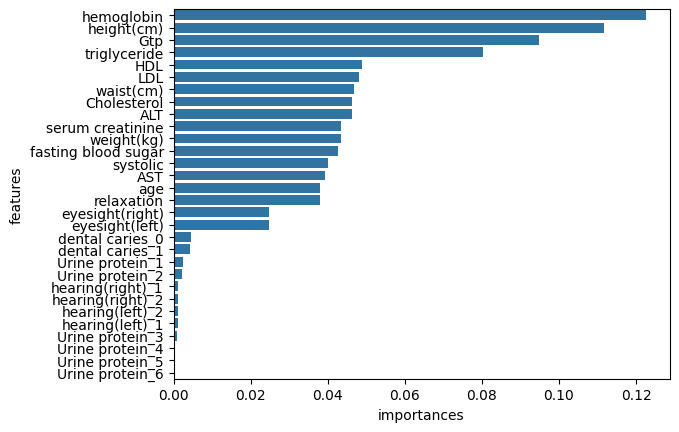

In [29]:
# Fit and evaluate a RandomForest with the one-hot train set
feat_importances(onehot_train)

Categorical features, encoded or not, don't benefit our model at all. We can maintain **dental_caries** and remove the rest.

In [30]:
# Drop all the categorical features
train.drop(["Urine protein", "hearing(left)", "hearing(right)"], axis=1, inplace=True)
test.drop(["Urine protein", "hearing(left)", "hearing(right)"], axis=1, inplace=True)
train.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
id                                                                            
0    55         165          60       81.0             0.5              0.6   
1    70         165          65       89.0             0.6              0.7   
2    20         170          75       81.0             0.4              0.5   
3    35         180          95      105.0             1.5              1.2   
4    30         165          60       80.5             1.5              1.0   

    systolic  relaxation  fasting blood sugar  Cholesterol  triglyceride  HDL  \
id                                                                              
0        135          87                   94          172           300   40   
1        146          83                  147          194            55   57   
2        118          75                   79          178           197   45   
3        131          88                   91          180           203   38   
4        121          76                   91          155            87   44   

    LDL  hemoglobin  serum creatinine  AST  ALT  Gtp  dental caries  smoking  
id                                                                            
0    75        16.5               1.0   22   25   27              0        1  
1   126        16.2               1.1   27   23   37              1        0  
2    93        17.4               0.8   27   31   53              0        1  
3   102        15.9               1.0   20   27   30              1        0  
4    93        15.4               0.8   19   13   17              0        1

# 4. Model Development

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import optuna

from sklearn.metrics import roc_auc_score

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier

In [32]:
#models_table.drop(models_table.index, inplace=True)

In [33]:
models_table = pd.DataFrame(columns=["Model",
                                     "Model Alias",
                                     "Detail",
                                     "Precision",
                                     "Recall",
                                     "F1-score",
                                     "Cross-Validated AUC"])

models_table = pd.DataFrame(columns=models_table.columns)
models_table.head()

Empty DataFrame
Columns: [Model, Model Alias, Detail, Precision, Recall, F1-score, Cross-Validated AUC]
Index: []

In [34]:
def train_evaluate(model, x_train, y_train, x_test, y_test, X, Y):
    # Train the model
    model.fit(x_train, y_train)

    # Predict probabilities and labels
    prediction_prob = model.predict_proba(x_test)
    prediction = model.predict(x_test)

    # Calculate accuracy, precision, recall, F1-score, log loss
    test_accuracy = model.score(x_test, y_test)
    train_accuracy = model.score(x_train, y_train)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    
    # Stratified sampling instead of random sampling for equal proportion
    stratified_kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    
    # Perform cross-validation on the test data and calculate mean accuracy and log loss
    results = cross_validate(model,
                              X,
                              Y,
                              cv=stratified_kf,
                              scoring='roc_auc')
    
    # Extract the scores
    auc_scores = results['test_score']
    
    # Calculate the means for each cross validated evaluation metrics
    mean_auc_scores = np.mean(auc_scores)

    # Print the evaluation metrics
    print("---------Debugging---------")
    print("*********Check Overfitting/Underfitting*********")
    print(f"AUC Scores: {auc_scores}")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("*********Evaluating Metric*********")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC: {mean_auc_scores:.4f}")
    
    return precision, recall, f1, mean_auc_scores

In [35]:
def model_tab(models_table, model_name, model_alias, model_detail, metrics):
    new_row = {
        "Model": model_name,
        "Model Alias": model_alias,
        "Detail": model_detail,
        "Precision": metrics[0],
        "Recall": metrics[1],
        "F1-score": metrics[2],
        "Cross-Validated AUC": metrics[3]
    }

    row_add = pd.DataFrame([new_row])

    models_table = pd.concat([models_table, row_add], ignore_index=True)

    return models_table

In [36]:
X = train.drop('smoking',axis=1)
Y = train['smoking'].values
 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (143330, 19) (143330,)
Test set: (15926, 19) (15926,)


## 4.3 Hyperparameter Tuning

**Optuna**

In [37]:
class opt_objective:
    def __init__(self, df=train):
        
        # Separate into X and y
        self.X = df.drop("smoking", axis=1)
        self.y = df["smoking"]
    
    def __str__(self):
        text = f"Features: {self.X.columns}\n\nTarget: {self.y.name}"
        return text

    def catboost(self, trial):
        """
        Objetive to optimize a CatBoostClassifier.
        """
        # Grid of hyperparameters
        params = {
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 10.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "thread_count": -1,
        "random_seed": 42,
        "verbose": False,
        }
    
        # Create the clf object
        clf = CatBoostClassifier(**params)

        # Cross validation
        cv = cross_val_score(clf, self.X, self.y, cv=5, scoring="roc_auc").mean()

        return cv
    
    def lgbm(self, trial):
        """
        Objetive to optimize a LGBMClassifier.
        """
        # Grid of hyperparameters
        params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1),
        "max_depth": trial.suggest_int("max_depth", 4, 10),
        "num_leaves": trial.suggest_int("num_leaves", 16, 256),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "random_state": 42,
        "n_jobs": -1,
        }
    
        # Create the clf object
        clf = LGBMClassifier(**params)

        # Cross validation
        cv = cross_val_score(clf, self.X, self.y, cv=5, scoring="roc_auc").mean()

        return cv
    
    def xgboost(self, trial):
        """
        Objetive to optimize a XGBClassifier.
        """
        # Grid of hyperparameters
        params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1),
        "max_depth": trial.suggest_int("max_depth", 4, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 1e-8, 1.0),
        "random_state": 42,
        "n_jobs": -1,
        }
    
        # Create the clf object
        clf = XGBClassifier(**params)

        # Cross validation
        cv = cross_val_score(clf, self.X, self.y, cv=5, scoring="roc_auc").mean()

        return cv

In [38]:
def optimize_hyperparameters(obj, n_trials=100):
    """
    This function creates a study to optimize the defined objective. In this case, the function tries to find the best parameters that maximize the roc_auc_score for the specified algorithm.
    """
    study = optuna.create_study(direction="maximize")
    optuna.logging.set_verbosity(optuna.logging.INFO)
    study.optimize(obj, n_trials=n_trials)
    best_params = study.best_params
    
    return best_params

In [39]:
# Create the class object
objective = opt_objective()

**Best Score**
- CatBoost 0.869259
- Light Gradient Boosting 0.865145
- XGBoost 0.865582


In [40]:
%%time
# Tuning CatBoost
catboost_optimal_params = optimize_hyperparameters(objective.catboost)
print(f"\n{catboost_optimal_params}\n")

[I 2023-11-12 03:17:12,872] A new study created in memory with name: no-name-66707e9e-cfce-4a89-9a5e-64874d68c3c0
[I 2023-11-12 03:18:21,529] Trial 0 finished with value: 0.8645432563706956 and parameters: {'iterations': 200, 'learning_rate': 0.09780274711515453, 'depth': 10, 'l2_leaf_reg': 8.85655158412107, 'border_count': 93}. Best is trial 0 with value: 0.8645432563706956.
[I 2023-11-12 03:18:55,711] Trial 1 finished with value: 0.8652301290303186 and parameters: {'iterations': 292, 'learning_rate': 0.07948614811361608, 'depth': 6, 'l2_leaf_reg': 3.2005784056546456, 'border_count': 130}. Best is trial 1 with value: 0.8652301290303186.
[I 2023-11-12 03:21:17,359] Trial 2 finished with value: 0.8625365564145339 and parameters: {'iterations': 707, 'learning_rate': 0.009755826490616085, 'depth': 9, 'l2_leaf_reg': 2.1133932151833594, 'border_count': 171}. Best is trial 1 with value: 0.8652301290303186.
[I 2023-11-12 03:22:23,933] Trial 3 finished with value: 0.8556229312703805 and parame


{'iterations': 925, 'learning_rate': 0.09804758835994856, 'depth': 6, 'l2_leaf_reg': 7.960178637362822, 'border_count': 250}

CPU times: user 10h 5min 49s, sys: 31min 11s, total: 10h 37min 1s
Wall time: 2h 48min 6s


CatBoost

{'iterations': 925, 'learning_rate': 0.09804758835994856, 'depth': 6, 'l2_leaf_reg': 7.960178637362822, 'border_count': 250}

In [41]:
%%time
# Tuning LGBM
lgbm_optimal_params = optimize_hyperparameters(objective.lgbm)
print(f"\n{lgbm_optimal_params}\n")

[I 2023-11-12 06:05:19,154] A new study created in memory with name: no-name-d353c7fd-c043-4b5c-894f-b2ed8c5ef46a
[I 2023-11-12 06:05:56,088] Trial 0 finished with value: 0.8679288743959266 and parameters: {'n_estimators': 442, 'learning_rate': 0.05843881702538214, 'max_depth': 6, 'num_leaves': 207, 'min_child_samples': 69}. Best is trial 0 with value: 0.8679288743959266.
[I 2023-11-12 06:06:14,807] Trial 1 finished with value: 0.8638802252304352 and parameters: {'n_estimators': 240, 'learning_rate': 0.0410525289010625, 'max_depth': 5, 'num_leaves': 139, 'min_child_samples': 71}. Best is trial 0 with value: 0.8679288743959266.
[I 2023-11-12 06:06:56,659] Trial 2 finished with value: 0.8685014060019036 and parameters: {'n_estimators': 661, 'learning_rate': 0.05562312877091233, 'max_depth': 5, 'num_leaves': 87, 'min_child_samples': 54}. Best is trial 2 with value: 0.8685014060019036.
[I 2023-11-12 06:07:32,551] Trial 3 finished with value: 0.8644600786833466 and parameters: {'n_estimator


{'n_estimators': 979, 'learning_rate': 0.09907876753877704, 'max_depth': 4, 'num_leaves': 228, 'min_child_samples': 82}

CPU times: user 3h 44min 17s, sys: 18min 31s, total: 4h 2min 48s
Wall time: 1h 25min 6s


LGBM

{'n_estimators': 979, 'learning_rate': 0.09907876753877704, 'max_depth': 4, 'num_leaves': 228, 'min_child_samples': 82}

In [42]:
%%time
# Tuning XGBoost
xgboost_optimal_params = optimize_hyperparameters(objective.xgboost)
print(f"\n{xgboost_optimal_params}\n")

[I 2023-11-12 07:30:25,188] A new study created in memory with name: no-name-93be9e90-424e-4ff3-87ca-731d5a3178a8
[I 2023-11-12 07:40:06,790] Trial 0 finished with value: 0.859104418064715 and parameters: {'n_estimators': 312, 'learning_rate': 0.0025463822891774214, 'max_depth': 10, 'subsample': 0.6573312594443559, 'colsample_bytree': 0.6717199217268972, 'gamma': 0.9217190877329556}. Best is trial 0 with value: 0.859104418064715.
[I 2023-11-12 07:43:45,646] Trial 1 finished with value: 0.8654375933865351 and parameters: {'n_estimators': 111, 'learning_rate': 0.08907435625977239, 'max_depth': 9, 'subsample': 0.6494465561899414, 'colsample_bytree': 0.8585493768112292, 'gamma': 0.35278555068717393}. Best is trial 1 with value: 0.8654375933865351.
[I 2023-11-12 07:49:50,301] Trial 2 finished with value: 0.8679173903337135 and parameters: {'n_estimators': 476, 'learning_rate': 0.0865224077048684, 'max_depth': 4, 'subsample': 0.7561557170932738, 'colsample_bytree': 0.9837165833129258, 'gamma

KeyboardInterrupt: 

XGBoost

{'n_estimators': 998, 'learning_rate': 0.06773845434507896, 'max_depth': 5, 'subsample': 0.8453730019020813, 'colsample_bytree': 0.5787545384234032, 'gamma': 0.04869602789896155}

**Retrain with Best Params**

In [76]:
def train_evaluate(model, x_train, y_train, x_test, y_test, X, Y):
    # Train the model
    model.fit(x_train, y_train)

    # Predict probabilities and labels
    prediction_prob = model.predict_proba(x_test)
    prediction = model.predict(x_test)

    # Calculate accuracy, precision, recall, F1-score, log loss
    test_accuracy = model.score(x_test, y_test)
    train_accuracy = model.score(x_train, y_train)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    
    # Stratified sampling instead of random sampling for equal proportion
    stratified_kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    
    print(f"Training {type(model).__name__}...\n")

    # Empty lists
    accuracy = []
    roc_auc = []

    for fold, (train_idx, val_idx) in enumerate(stratified_kf.split(X, Y)):
        # Convert NumPy arrays back to Pandas DataFrames
        X_train_split, y_train_split = pd.DataFrame(X).iloc[train_idx], pd.Series(Y).iloc[train_idx]
        X_val_split, y_val_split = pd.DataFrame(X).iloc[val_idx], pd.Series(Y).iloc[val_idx]

        # Fit the algorithm
        model.fit(X_train_split, y_train_split)

        # Predict using the validation set
        y_pred_val = model.predict(X_val_split)
        y_pred_proba_val = model.predict_proba(X_val_split)[:, 1]

        # Metrics
        accuracy_val = accuracy_score(y_val_split, y_pred_val)
        roc_auc_val = roc_auc_score(y_val_split, y_pred_proba_val)

        # Print the score of each fold
        print(50 * ".")
        print(f"Fold {fold + 1}:")
        print("Accuracy Score (validation):", accuracy_val)
        print("ROC AUC Score (validation):", roc_auc_val)
        print(50 * ".")

        # Store the results
        accuracy.append(accuracy_val)
        roc_auc.append(roc_auc_val)

    # Print the results
    print("\n")
    print(f"{type(model).__name__} results (validation):")
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("ROC AUC Score:", np.mean(roc_auc))
    print("\n")

    return precision, recall, f1, np.mean(roc_auc)

In [72]:
catboost_optimal_params = {'iterations': 925,
                           'learning_rate': 0.09804758835994856,
                           'depth': 6,
                           'l2_leaf_reg': 7.960178637362822,
                           'border_count': 250}

lgbm_optimal_params = {'n_estimators': 979,
                       'learning_rate': 0.09907876753877704,
                       'max_depth': 4,
                       'num_leaves': 228,
                       'min_child_samples': 82}
 
xgboost_optimal_params = {'n_estimators': 998,
                          'learning_rate': 0.06773845434507896,
                          'max_depth': 5,
                          'subsample': 0.8453730019020813,
                          'colsample_bytree': 0.5787545384234032,
                          'gamma': 0.04869602789896155}

Use all best parameters

In [77]:
%%time

# List of best models
best_models = [
    CatBoostClassifier(**catboost_optimal_params, verbose=False),
    LGBMClassifier(**lgbm_optimal_params),
    XGBClassifier(**xgboost_optimal_params)
]

for model in best_models:
    # Assuming x_train, y_train, x_test, y_test, X, and Y are defined
    train_evaluate(model, x_train, y_train, x_test, y_test, X, Y)

Training CatBoostClassifier...

..................................................
Fold 1:
Accuracy Score (validation): 0.7830591485620997
ROC AUC Score (validation): 0.8685841594120423
..................................................
..................................................
Fold 2:
Accuracy Score (validation): 0.7786638201682783
ROC AUC Score (validation): 0.8656654868288831
..................................................
..................................................
Fold 3:
Accuracy Score (validation): 0.7848172799196282
ROC AUC Score (validation): 0.8722455818567735
..................................................
..................................................
Fold 4:
Accuracy Score (validation): 0.7847544895140023
ROC AUC Score (validation): 0.8689243882299889
..................................................
..................................................
Fold 5:
Accuracy Score (validation): 0.7822428732889615
ROC AUC Score (validation): 0.86802746495

In [79]:
%%time
from sklearn.ensemble import VotingClassifier

best_models = [
    ("catboost", CatBoostClassifier(**catboost_optimal_params, verbose=False)),
    ("lgbm", LGBMClassifier(**lgbm_optimal_params)),
    ("xgboost", XGBClassifier(**xgboost_optimal_params))
]

ranking_ens = [1,2,3]

# Create the VotingClassifier with the transformer as a preprocessing step
ve1 = VotingClassifier(
    estimators=best_models,
    voting="soft",
    weights=ranking_ens)

# Function to train and evaluate the model
final_eval = train_evaluate(ve1, x_train, y_train, x_test, y_test, X, Y)

Training VotingClassifier...

..................................................
Fold 1:
Accuracy Score (validation): 0.7874544769559212
ROC AUC Score (validation): 0.8712578442229605
..................................................
..................................................
Fold 2:
Accuracy Score (validation): 0.7802335803089288
ROC AUC Score (validation): 0.8670956155664247
..................................................
..................................................
Fold 3:
Accuracy Score (validation): 0.7882079618234333
ROC AUC Score (validation): 0.8751684681463023
..................................................
..................................................
Fold 4:
Accuracy Score (validation): 0.7889614466909456
ROC AUC Score (validation): 0.8713833487426932
..................................................
..................................................
Fold 5:
Accuracy Score (validation): 0.7860102976265226
ROC AUC Score (validation): 0.8712602340860

In [82]:
X_test = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv', index_col='id')
X_test.drop(["Urine protein", "hearing(left)", "hearing(right)"], axis=1, inplace=True)
X_test.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries'],
      dtype='object')

In [83]:
y_prob = ve1.predict_proba(X_test)[:, 1]
submission = pd.DataFrame({'id': X_test.index, 'smoking': y_prob})
#submission.to_csv('data/submission.csv', index=False)
submission.to_csv('submission.csv', index=False)
submission.head()

id   smoking
0  159256  0.641058
1  159257  0.200837
2  159258  0.393288
3  159259  0.016874
4  159260  0.598835